In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Reading data

In [376]:
df = pd.read_csv("./Shopping_data.csv")
df = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df['Genre'] = df['Genre'].replace({'Male':1,'Female':0})
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)':'Spending_Score'})
df.describe()
df.head(5)

,Genre,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


##### is there missing data?

In [377]:
df.isna().sum()

Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

array([[<Axes: title={'center': 'Genre'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

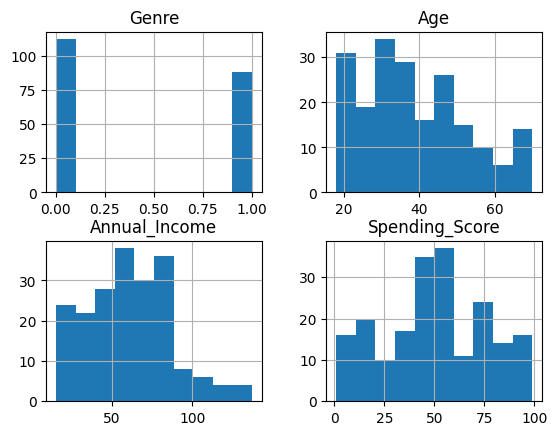

In [378]:
df.hist()

##### normalize data:

In [379]:
# min_max_scaler = MinMaxScaler()
# df_scaled = min_max_scaler.fit_transform(df)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# df_scaled.head(5)
df_scaled = df

# Data Visualization

Text(0, 0.5, 'Genre')

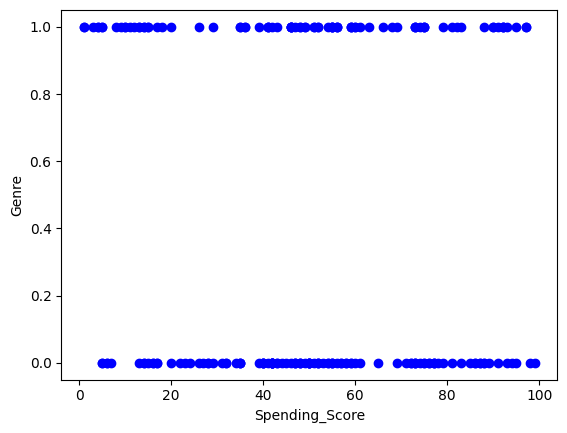

In [380]:
plt.scatter(df_scaled.Spending_Score, df.Genre, color="blue")
plt.xlabel("Spending_Score")
plt.ylabel("Genre")

Text(0, 0.5, 'Annual_Income')

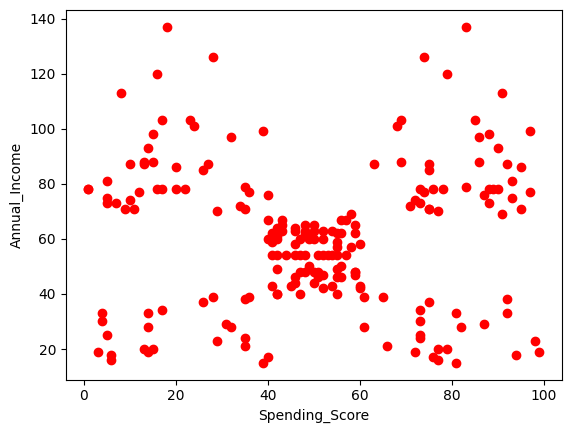

In [381]:
plt.scatter(df_scaled.Spending_Score, df.Annual_Income, color="red")
plt.xlabel("Spending_Score")
plt.ylabel("Annual_Income")

Text(0, 0.5, 'Age')

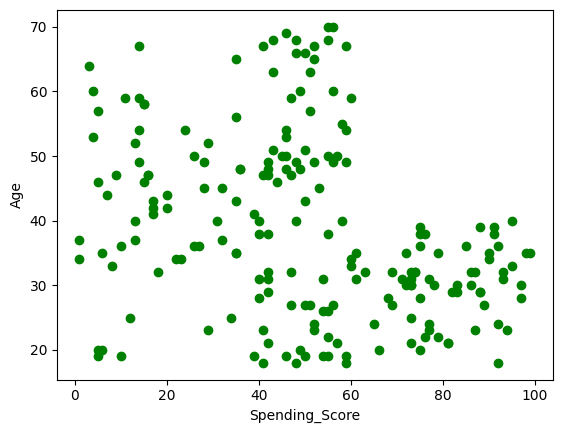

In [382]:
plt.scatter(df_scaled.Spending_Score, df.Age, color="green")
plt.xlabel("Spending_Score")
plt.ylabel("Age")

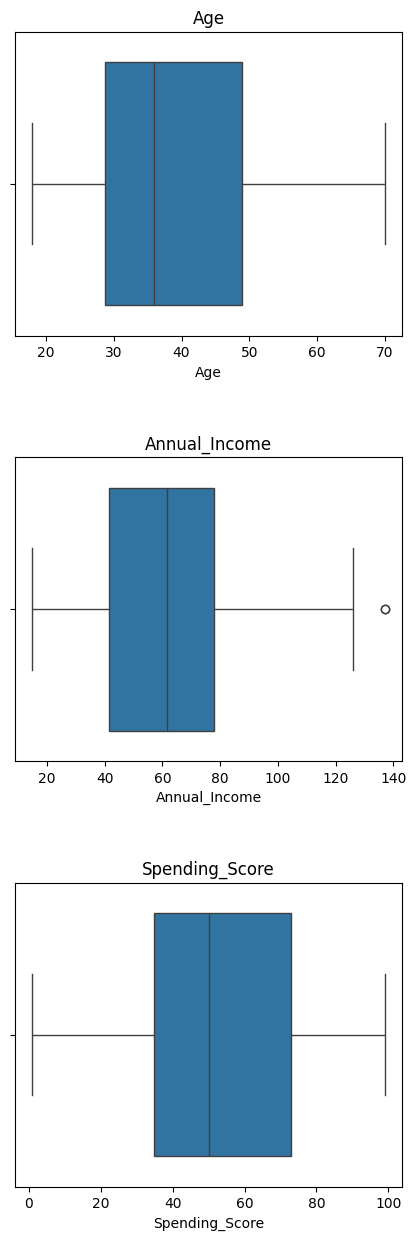

In [383]:
columns = ['Age', 'Annual_Income', 'Spending_Score']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))
fig.subplots_adjust(hspace=0.4)
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df_scaled, ax=ax[i])
    ax[i].set_title(column)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15948\1252381434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_scaled['Genre'], data = df_scaled, palette = 'Set1')


<Axes: title={'center': 'Genre'}, xlabel='count', ylabel='Genre'>

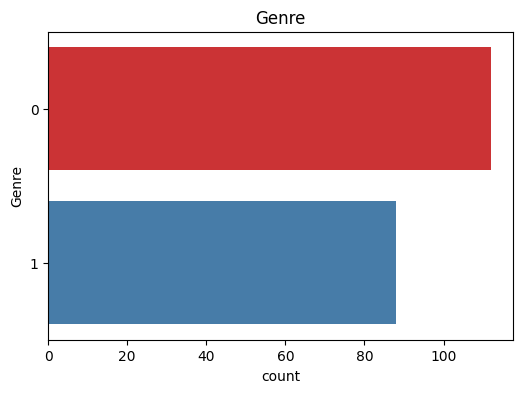

In [384]:
plt.figure(figsize=(6,4))
plt.title("Genre")
sns.countplot(y=df_scaled['Genre'], data = df_scaled, palette = 'Set1')

# Applying Model

In [385]:
X = df_scaled[['Genre', 'Age', 'Annual_Income']].values
y = df_scaled[['Spending_Score']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=25)

##### apllying linear regression

In [386]:
model_linear_regression = LinearRegression()
regression = model_linear_regression.fit(X_train,y_train)

In [387]:
predictiion = regression.predict(X_test)
mse = mean_squared_error(y_test, predictiion)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, predictiion)
print("r2 score:", r2)

Mean Squared Error: 386.39113576058185
r2 score: 0.10540911539200615


##### making it polynomial

In [388]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [389]:
model_linear_regression_poly = LinearRegression()
model_linear_regression_poly.fit(X_train_poly,y_train)

LinearRegression()

In [390]:
predictiion_poly = model_linear_regression_poly.predict(X_test_poly)
mse = mean_squared_error(y_test, predictiion_poly)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, predictiion_poly)
print("r2 score:", r2)

Mean Squared Error: 303.29359471657995
r2 score: 0.297800440842507
